## Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
import os

In [3]:
# add library tree module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/..")

In [4]:
import numpy as np
from random import randint
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import graphviz
from graphviz import Source

from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from woodpecker.decision_tree_structure_classifier import DecisionTreeStructureClassifier


## Util functions

In [5]:
def print_scores(model, train, valid, features, target):
    """Print metrics specific to this dataset
    """
    
    prediction_train = model.predict(train[features])
    prediction_valid = model.predict(valid[features])
    print(f"train accuracy {accuracy_score(train[target], prediction_train)}")
    print(f"valid accuracy {accuracy_score(valid[target], prediction_valid)}")
    
def save_decision_tree_structure(model_param, filename_param, features_param):
    graph = Source(sklearn.tree.export_graphviz(model_param, feature_names=features_param, class_names=["0", "1"],
                                                filled=True, node_ids=True))
    graph.format = 'png'
    graph.render(filename=filename_param,view=True)
    

## Data load - [titanic dataset](https://www.kaggle.com/c/titanic/data)

In [6]:
dataset = pd.read_csv("../resources/dataset/train_titanic.csv")

In [7]:
dataset.shape

(891, 12)

In [8]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## EDA

In [9]:
dataset.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data transformation

#TODO To avoid any kind of data leakage, make these tranformations only on training dataset and apply them on validation 

In [11]:
# Age
dataset["Age_na"] = dataset["Age"].isna().astype(int)
dataset.fillna({"Age":dataset.median()["Age"]}, inplace=True)

#Sex
dataset["Sex_label"] = dataset["Sex"].astype("category").cat.codes

#Cabin
dataset["Cabin_label"] = dataset["Cabin"].astype("category").cat.codes

# Embarked
dataset["Embarked_label"] = dataset["Embarked"].astype("category").cat.codes

## Select features and target variables


In [12]:
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"

## Train/validation split

In [13]:
random_state = 1987
train, valid = train_test_split(dataset, test_size = 0.2, stratify = dataset.Survived, random_state=random_state)

In [14]:
train[features].describe()

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.328652,29.299045,32.199297,0.644663,16.914326,1.553371
std,0.827699,12.901403,51.320699,0.478952,38.664917,0.781261
min,1.000000,0.420000,0.000000,0.000000,-1.000000,-1.000000
25%,2.000000,22.000000,7.895800,0.000000,-1.000000,1.000000
50%,3.000000,28.000000,13.825000,1.000000,-1.000000,2.000000
75%,3.000000,35.000000,30.000000,1.000000,-1.000000,2.000000
max,3.000000,80.000000,512.329200,1.000000,146.000000,2.000000


## Decision tree structure visualizations

### Before starting we must understand :
    - what is a decision tree ?
    - what is a split/leaf node ?
    - understand node information

In [15]:
max_depth = 3

In [16]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=random_state)
_ = model.fit(train[features], train[target])

In [17]:
save_decision_tree_structure(model, f"dtree_rander_{max_depth}", features)

### Default values

In [18]:
model = DecisionTreeClassifier(criterion="entropy", random_state=random_state)
model.fit(train[features], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1987,
            splitter='best')

#### Model scores

In [19]:
print_scores(model, train, valid, features, target)

train accuracy 0.9873595505617978
valid accuracy 0.770949720670391


In [20]:
save_decision_tree_structure(model, f"dtree_rander_none", features)

#### Init decision tree structure

In [19]:
dts = DecisionTreeStructureClassifier(model, train, features, target)

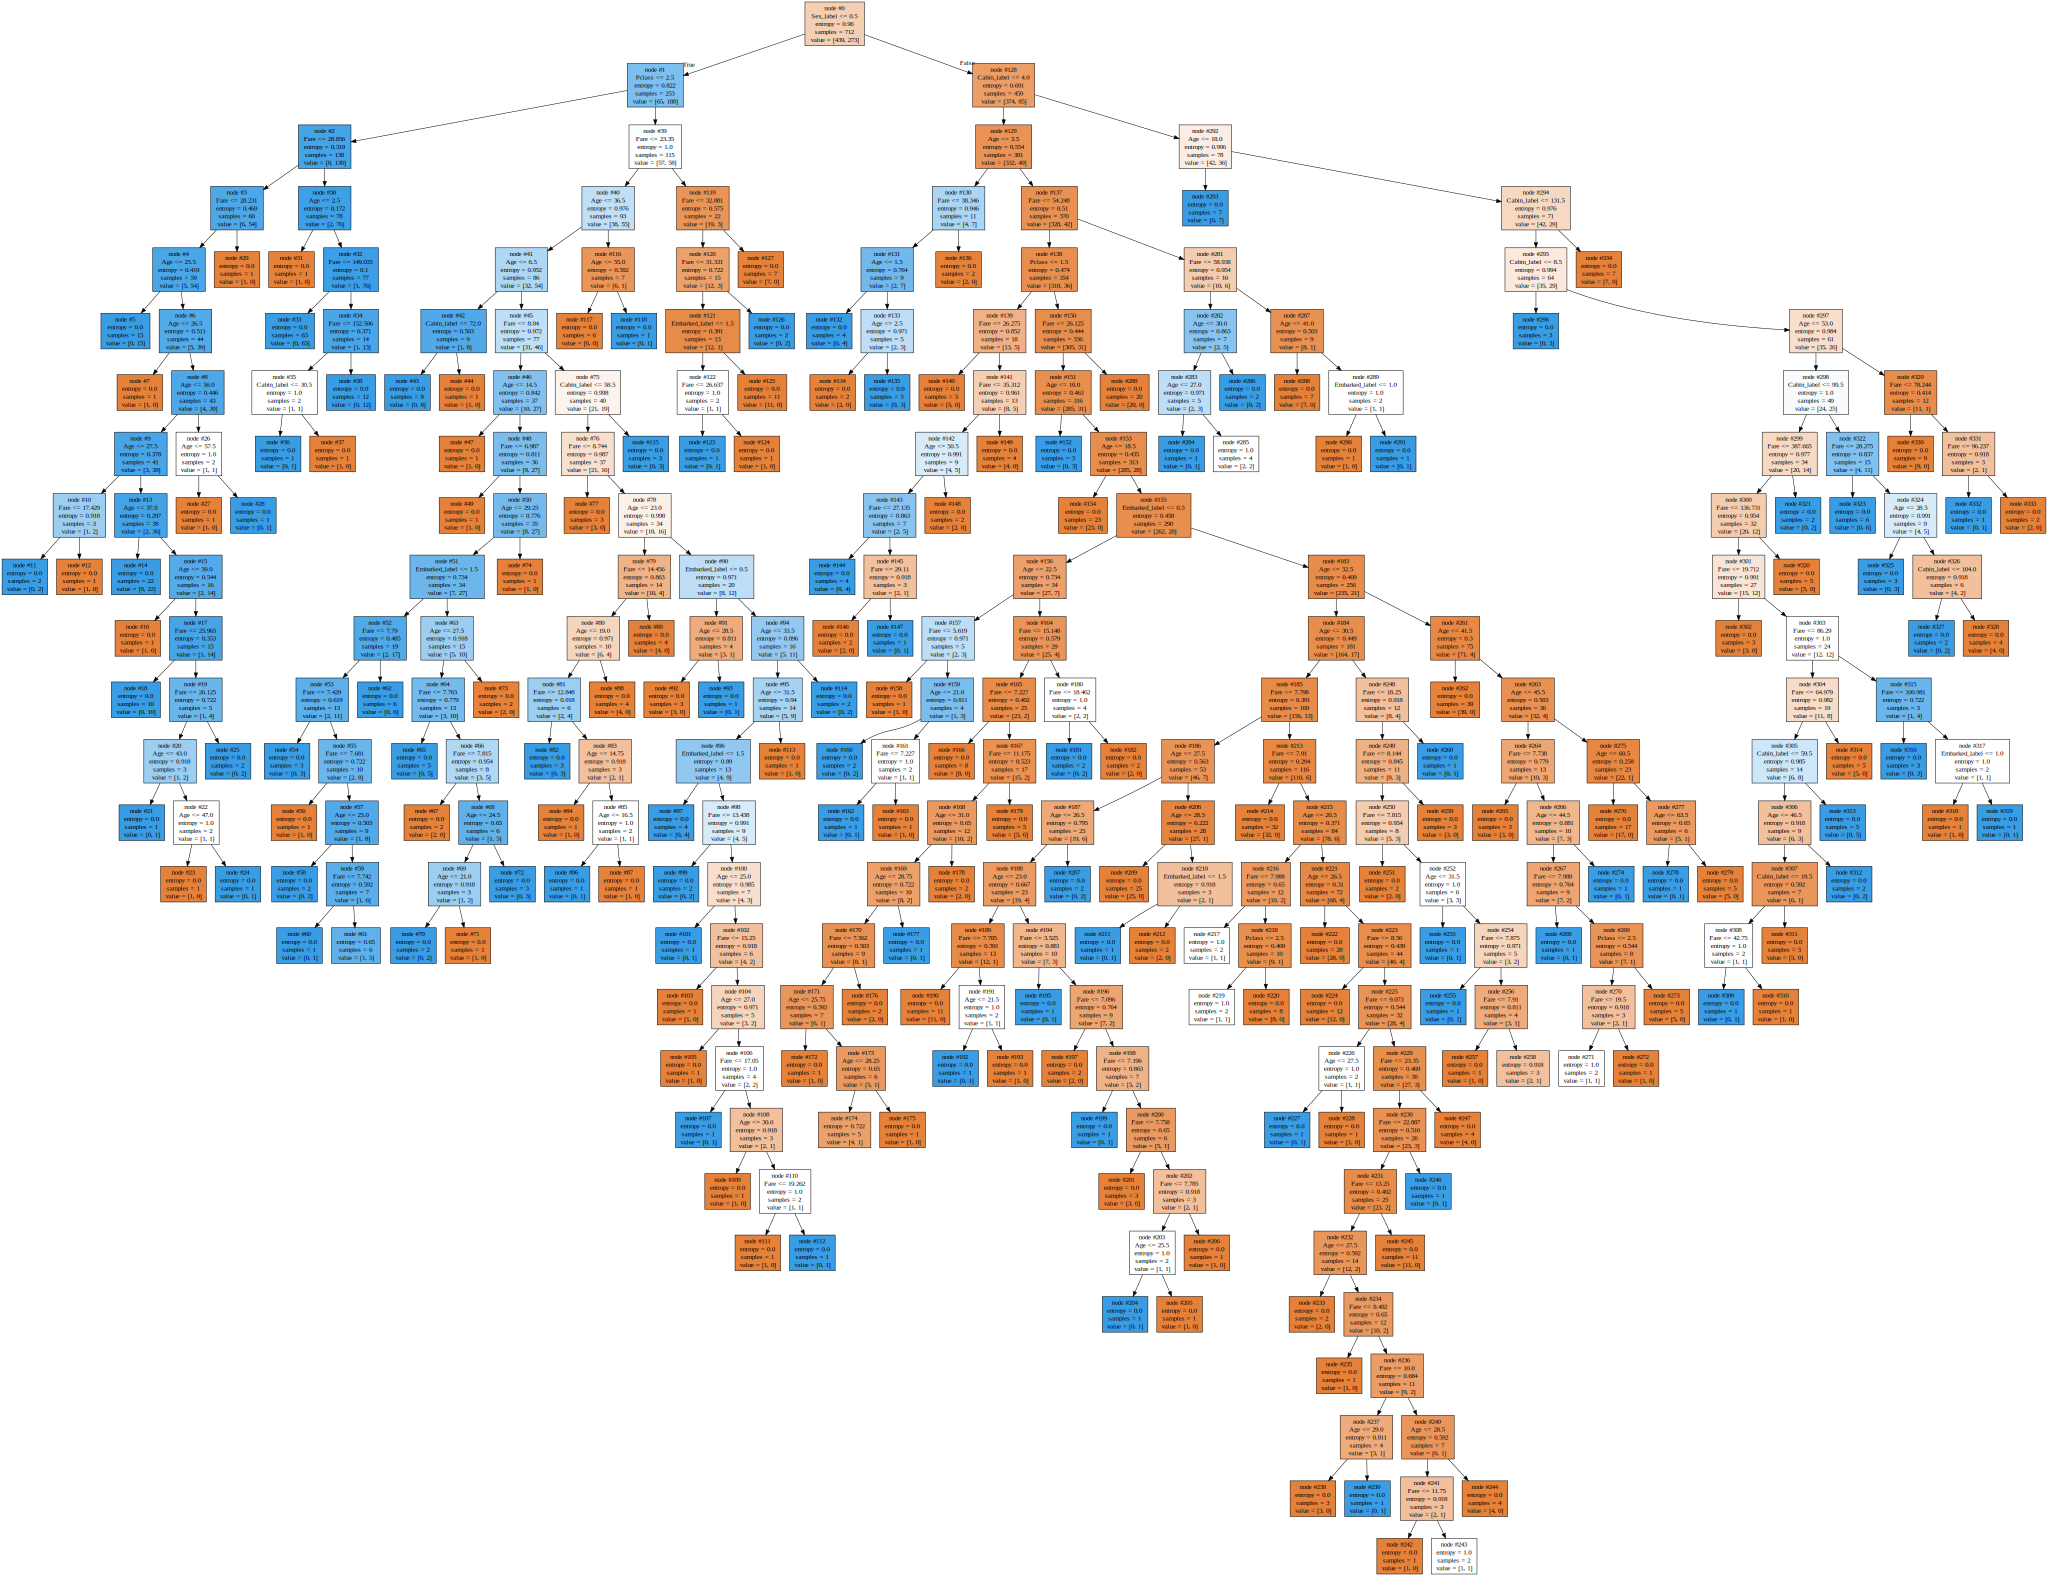

In [20]:
dts.show_decision_tree_structure(rotate=False)

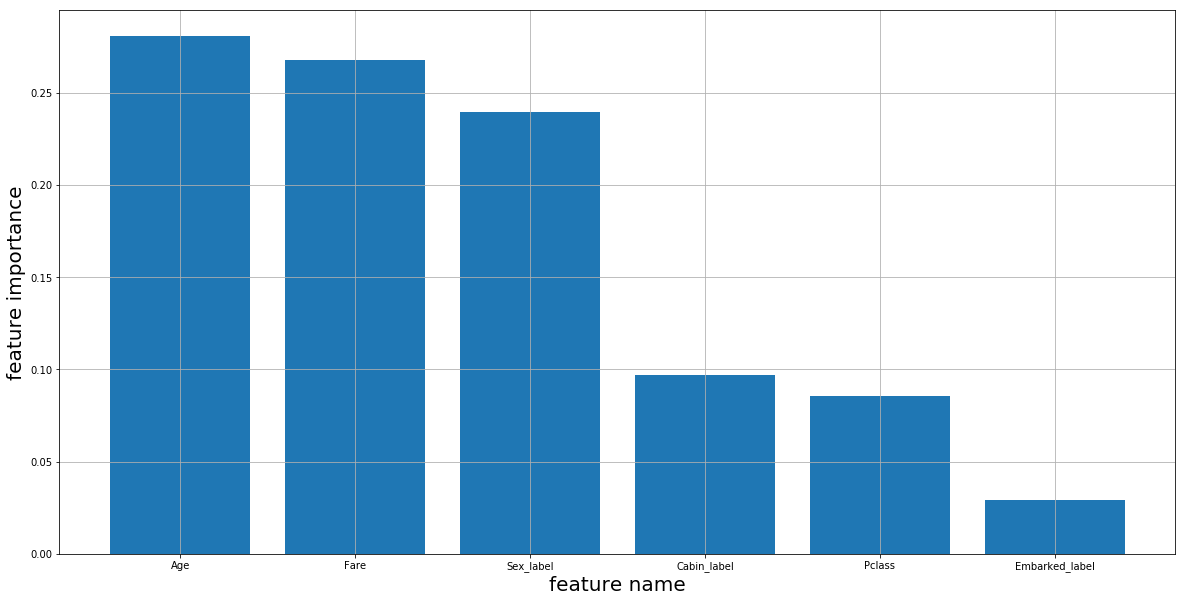

In [21]:
dts.show_features_importance()

#### Leaves impurity distribution

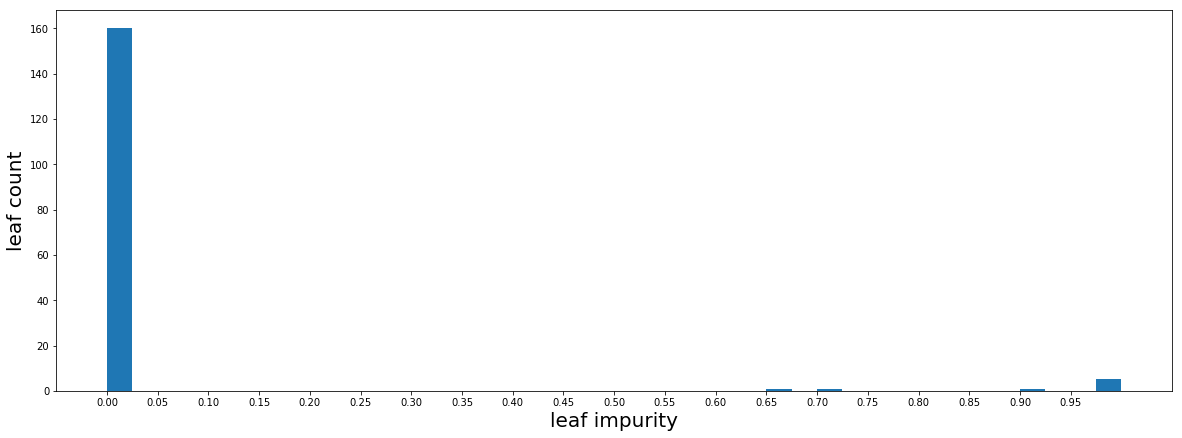

In [22]:
dts.show_leaf_impurity_distribution(bins = 40, figsize=(20,7))

#### Leaves sample distribution

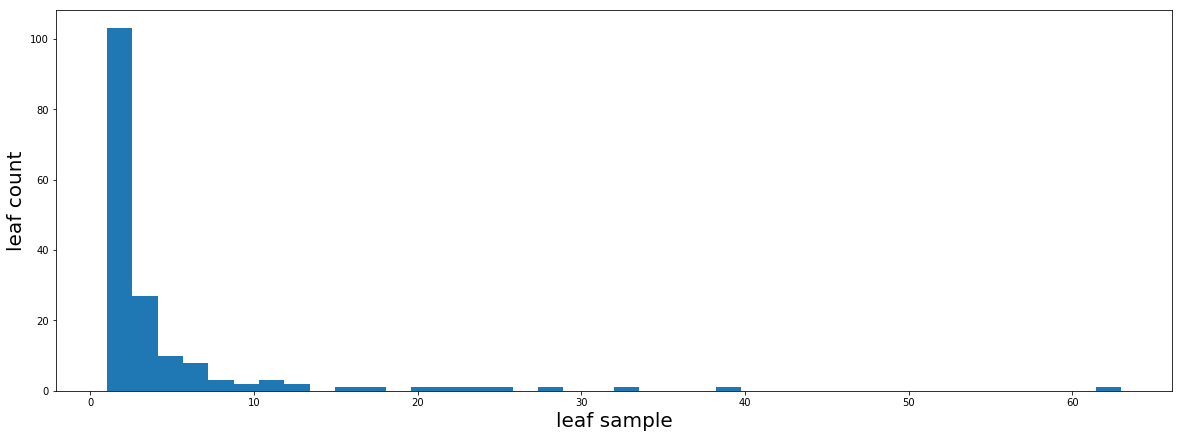

In [23]:
dts.show_leaf_samples_distribution(bins=40, figsize=(20,7))

#### Leaves stats

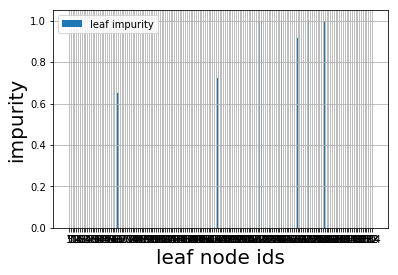

In [24]:
dts.show_leaf_impurity()

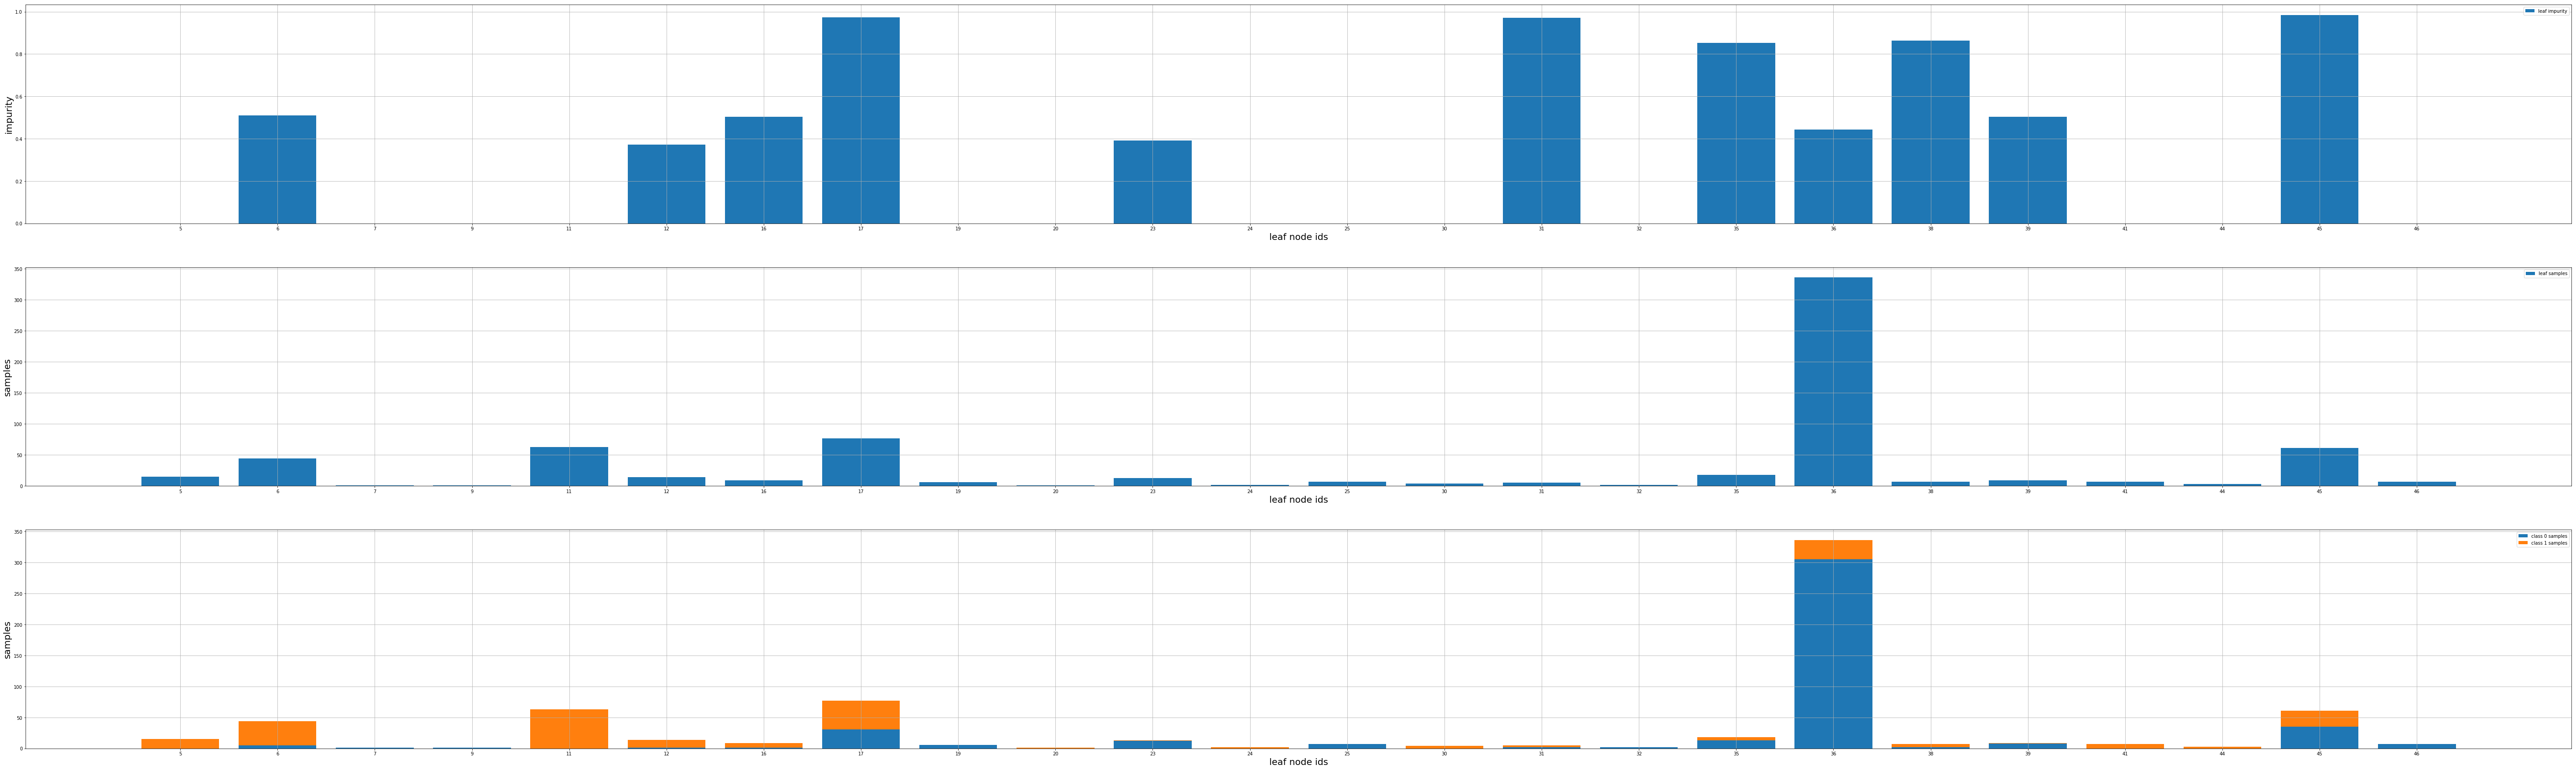

In [35]:
plt.figure(figsize=(100,30))
plt.subplot(3,1,1)
dts.show_leaf_impurity()

plt.subplot(3,1,2)
dts.show_leaf_samples()

plt.subplot(3,1,3)
dts.show_leaf_samples_by_class()

##### Investigate leaf impurity > 0

In [36]:
# Investigate leaf impurity
dts.get_node_samples(node_id=33)[features + [target]]

INFO - decision paths [[1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 [1 1 0 ... 0 0 0]] 


,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label,Survived
0,3,19.0,7.8958,1,-1,2,0
487,2,31.0,10.5000,1,-1,2,0
486,3,44.0,8.0500,1,-1,2,0
484,3,24.5,8.0500,1,-1,2,0
483,3,45.0,6.9750,1,-1,2,0
476,3,40.0,15.5000,1,-1,1,0
468,3,28.0,7.8958,1,-1,2,0
466,3,33.0,8.6542,1,-1,2,0
464,3,26.0,8.6625,1,-1,2,0
462,2,30.0,10.5000,1,-1,2,0


##### Investigate leaf samples


In [37]:
dts.get_node_samples(node_id=33)[features + [target]]

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label,Survived
0,3,19.0,7.8958,1,-1,2,0
487,2,31.0,10.5000,1,-1,2,0
486,3,44.0,8.0500,1,-1,2,0
484,3,24.5,8.0500,1,-1,2,0
483,3,45.0,6.9750,1,-1,2,0
476,3,40.0,15.5000,1,-1,1,0
468,3,28.0,7.8958,1,-1,2,0
466,3,33.0,8.6542,1,-1,2,0
464,3,26.0,8.6625,1,-1,2,0
462,2,30.0,10.5000,1,-1,2,0


In [38]:
train["Fare"].mean()

32.19929691011236

In [39]:
dts.get_node_samples(node_id=33)[features + [target]].describe()

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label,Survived
count,370.000000,370.000000,370.000000,370.0,370.000000,370.000000,370.000000
mean,2.672973,29.277027,15.272565,1.0,-0.981081,1.675676,0.113514
std,0.578358,10.851780,15.840167,0.0,0.237806,0.676915,0.317649
min,1.000000,4.000000,0.000000,1.0,-1.000000,0.000000,0.000000
25%,2.000000,23.000000,7.775000,1.0,-1.000000,2.000000,0.000000
50%,3.000000,28.000000,8.418750,1.0,-1.000000,2.000000,0.000000
75%,3.000000,33.000000,15.500000,1.0,-1.000000,2.000000,0.000000
max,3.000000,74.000000,135.633300,1.0,3.000000,2.000000,1.000000


### max_depth=5

In [26]:
max_depth = 5

In [43]:
model2 = DecisionTreeClassifier(criterion="entropy", random_state=random_state, max_depth=max_depth)
model2.fit(train[features], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1987,
            splitter='best')

In [61]:
save_decision_tree_structure(model2, f"dtree_rander_{max_depth}", features)

#### Model scores

In [44]:
print_scores(model2, train, valid, features, target)

train accuracy 0.851123595505618
valid accuracy 0.8156424581005587


In [45]:
dts2 = DecisionTreeStructureClassifier(model2, train, features, target)

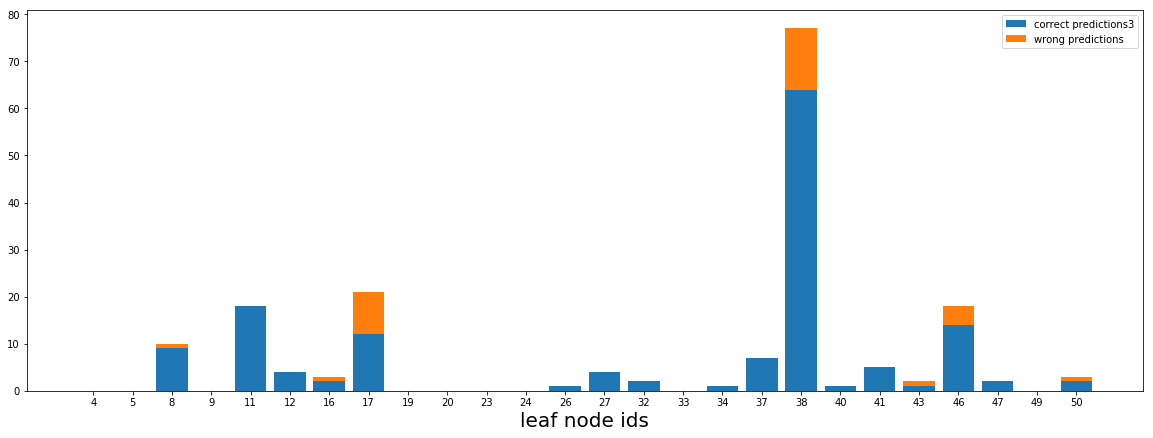

In [37]:
dts2.show_leaf_predictions(valid, list(valid[target]))

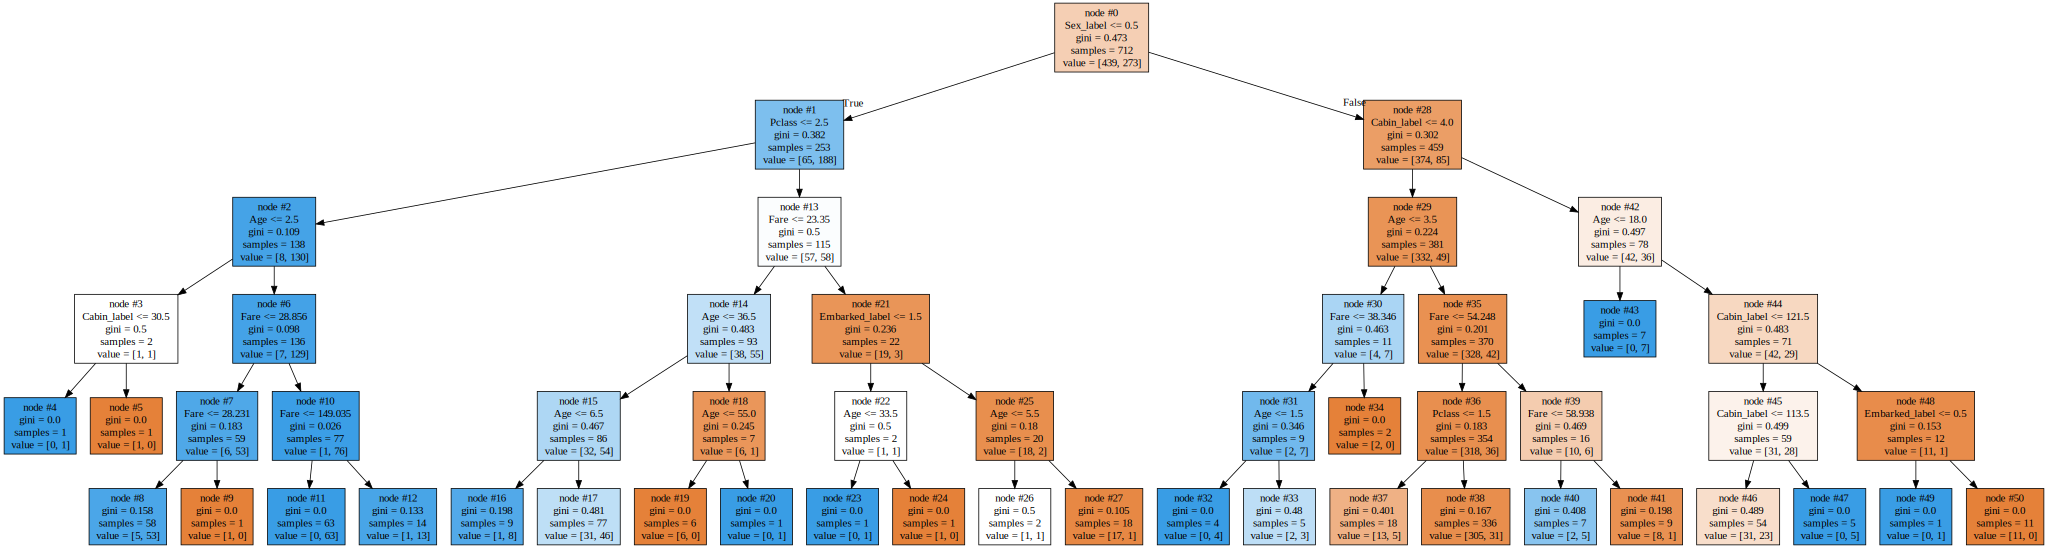

In [38]:
dts2.show_decision_tree_structure(rotate=False)

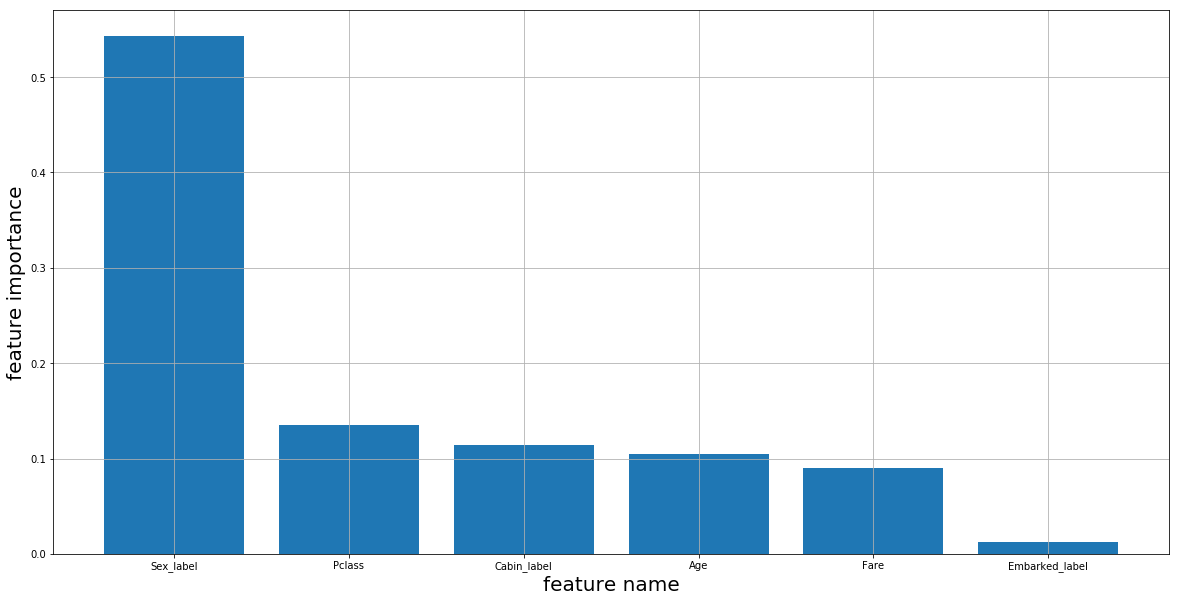

In [39]:
dts2.show_features_importance()

#### Leaves impurity distribution

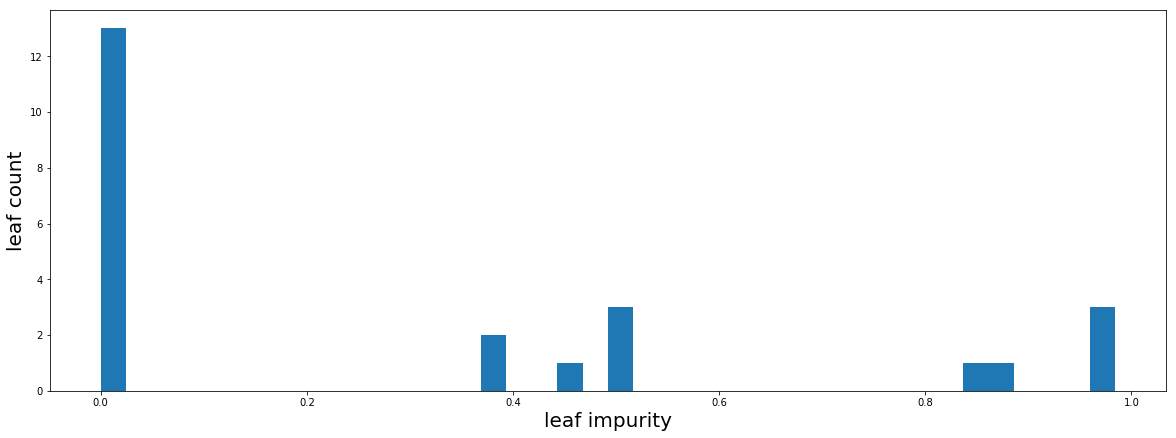

In [46]:
dts2.show_leaf_impurity_distribution(figsize=(20,7), bins=40)

#### Leaves sample distribution

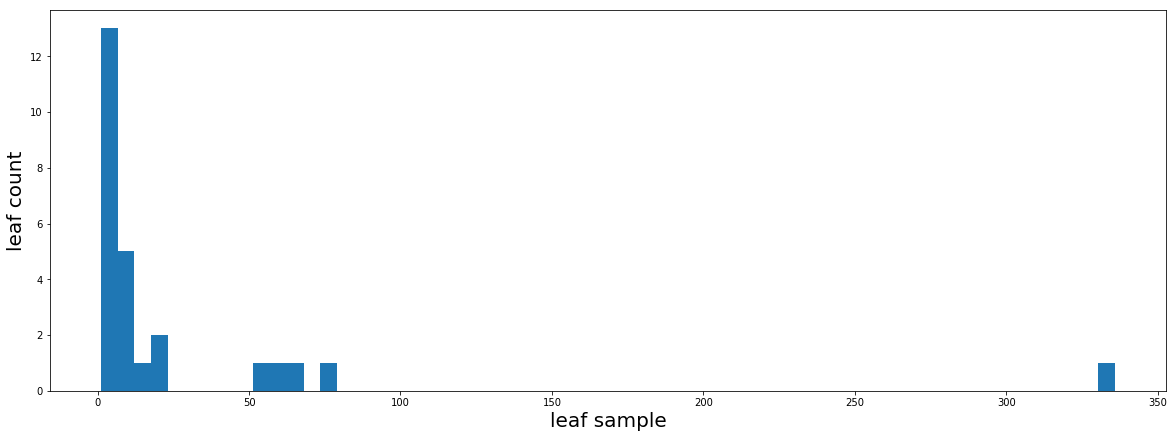

In [41]:
dts2.show_leaf_samples_distribution(figsize=(20, 7), bins=60)

#### Leaves stats

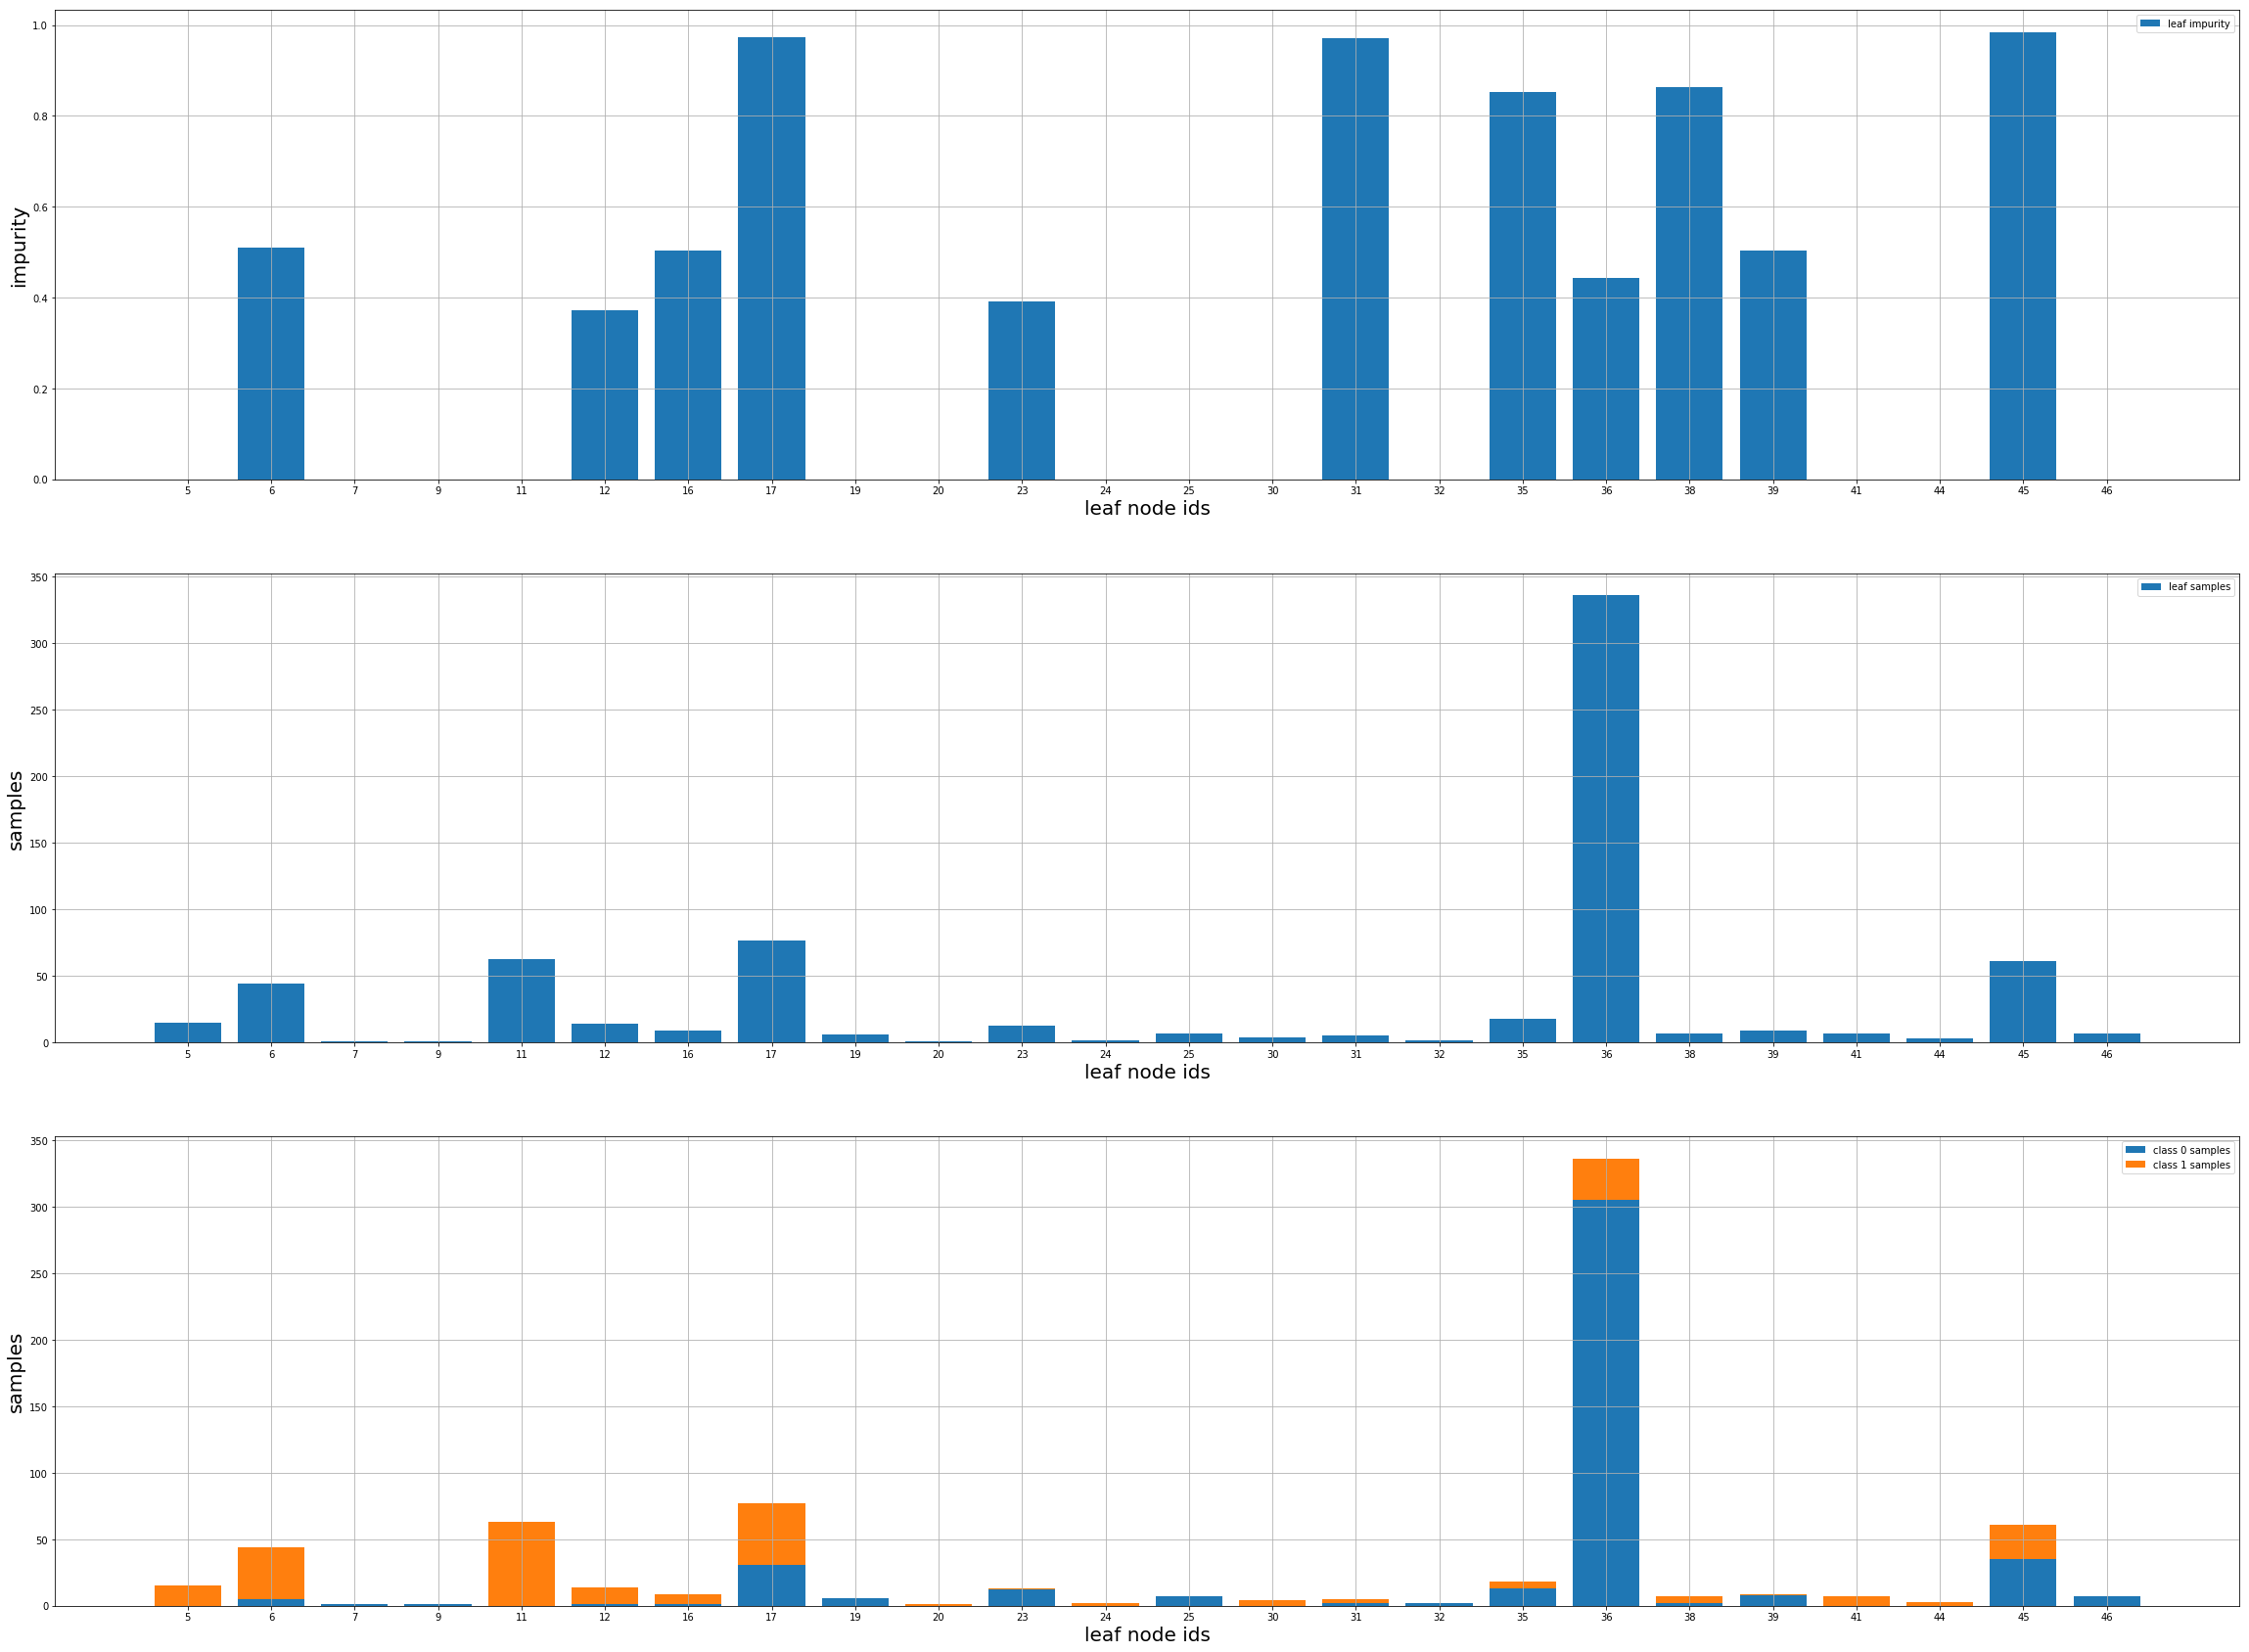

In [51]:
plt.figure(figsize=(40,30))
plt.subplot(3,1,1)
dts2.show_leaf_impurity()

plt.subplot(3,1,2)
dts2.show_leaf_samples()

plt.subplot(3,1,3)
dts2.show_leaf_samples_by_class()

#### Investigate predictions

In [49]:
sample = valid[features].iloc[randint(0, len(valid))]
sample

Pclass             3.0000
Age               28.0000
Fare               7.8958
Sex_label          1.0000
Cabin_label       -1.0000
Embarked_label     2.0000
Name: 878, dtype: float64

In [50]:
model2.predict([sample])

array([0])

INFO - Make a prediction for sample Pclass             3.0000
Age               28.0000
Fare               7.8958
Sex_label          1.0000
Cabin_label       -1.0000
Embarked_label     2.0000
Name: 878, dtype: float64
INFO - decision path [ 0 26 27 33 34 36]


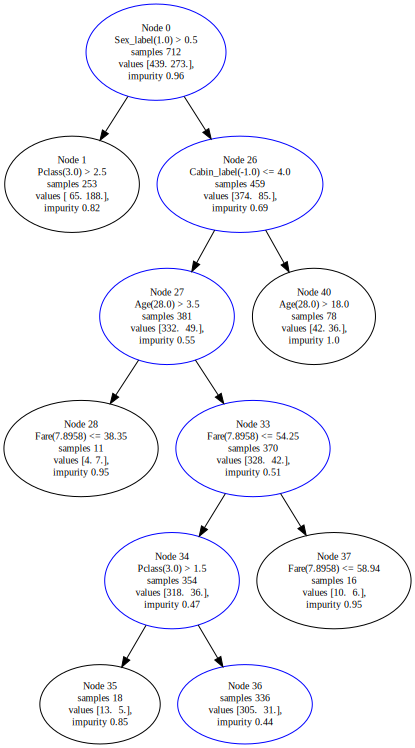

In [54]:
dts2.show_decision_tree_prediction_path(sample)

[('Pclass', 1.0), ('Age', 18.0), ('Fare', 227.525), ('Sex_label', 0.0), ('Cabin_label', 73.0), ('Embarked_label', 0.0)]



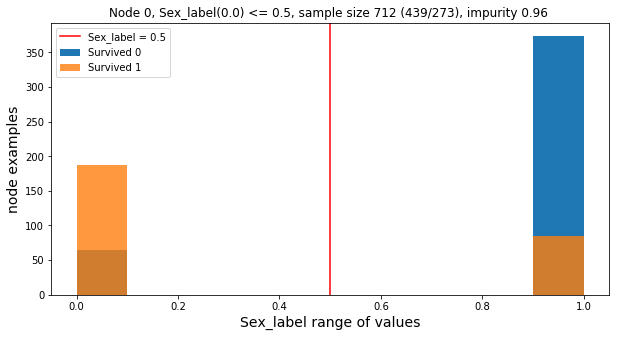

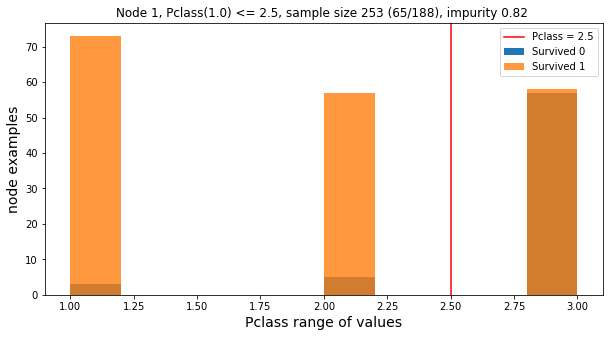

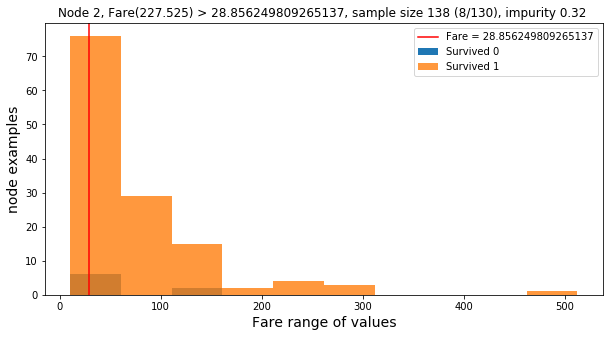

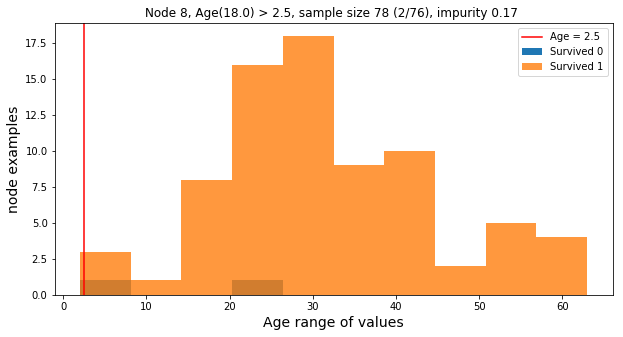

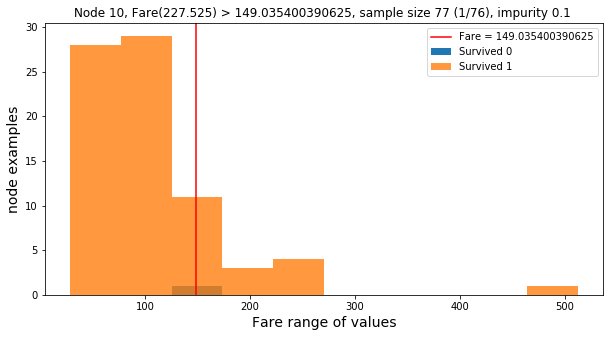

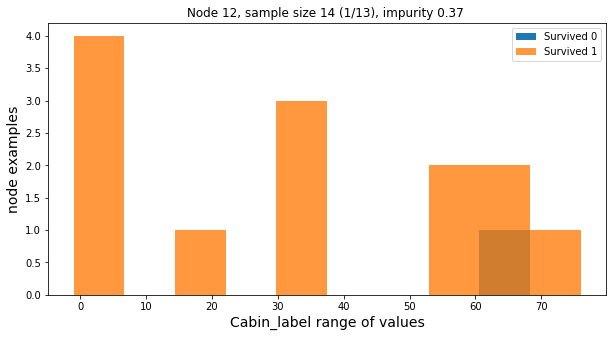

In [59]:
dts2.show_decision_tree_splits_prediction(sample)

### min_sample_split = 20

In [60]:
model3 = DecisionTreeClassifier(criterion="entropy", random_state=random_state, min_samples_split=20)
model3.fit(train[features], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1987,
            splitter='best')

#### Init decision tree structure

In [62]:
dts3 = DecisionTreeStructureClassifier(model3, train, features, target)

#### Model scores

In [63]:
print_scores(model3, train, valid, features, target)

train accuracy 0.8876404494382022
valid accuracy 0.8044692737430168


In [64]:
train.shape

(712, 16)

#### Feature importance

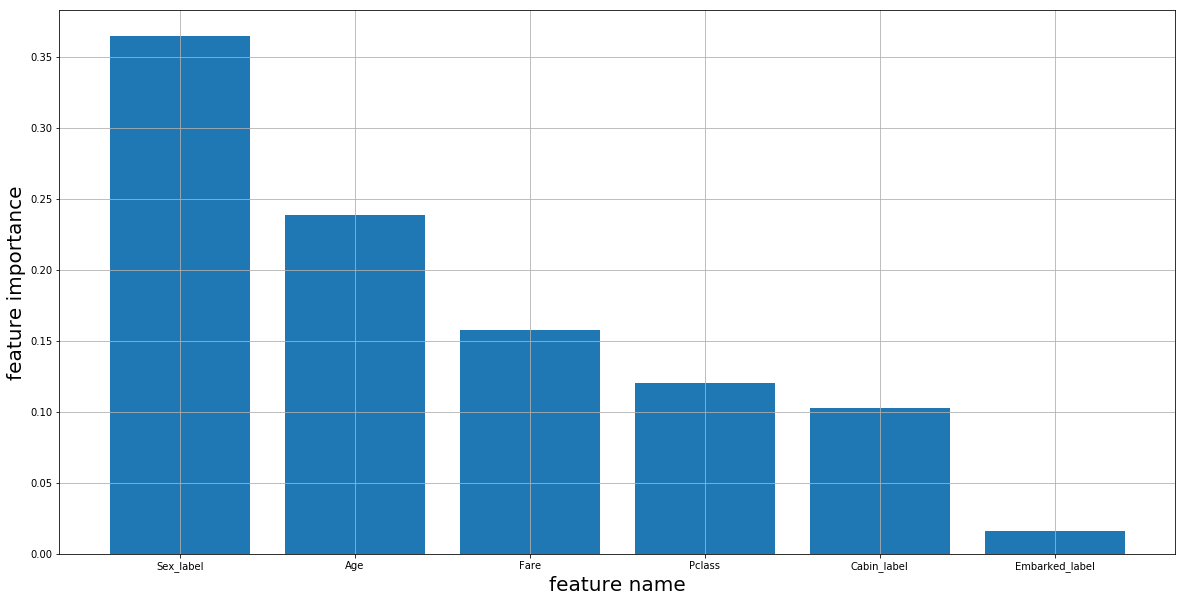

In [65]:
dts3.show_features_importance()

In [66]:
save_decision_tree_structure(model3, f"dtree_rander", features)

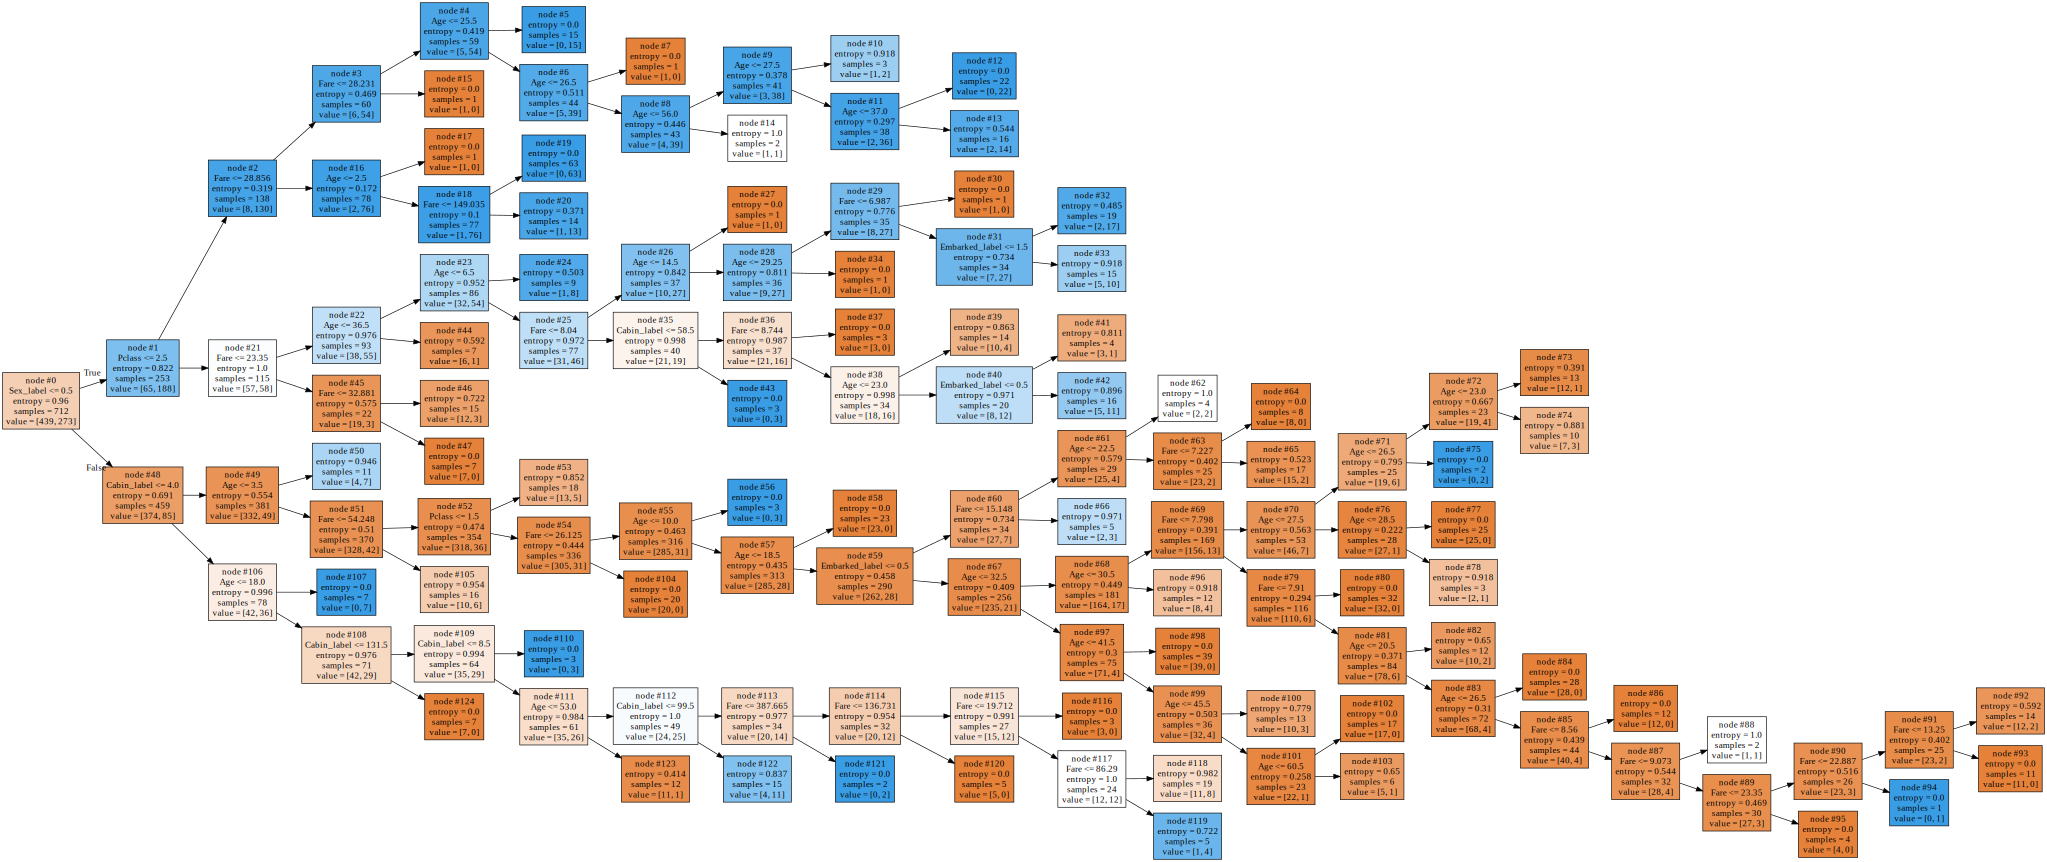

In [80]:
dts3.show_decision_tree_structure()

#### Leaves impurity distribution

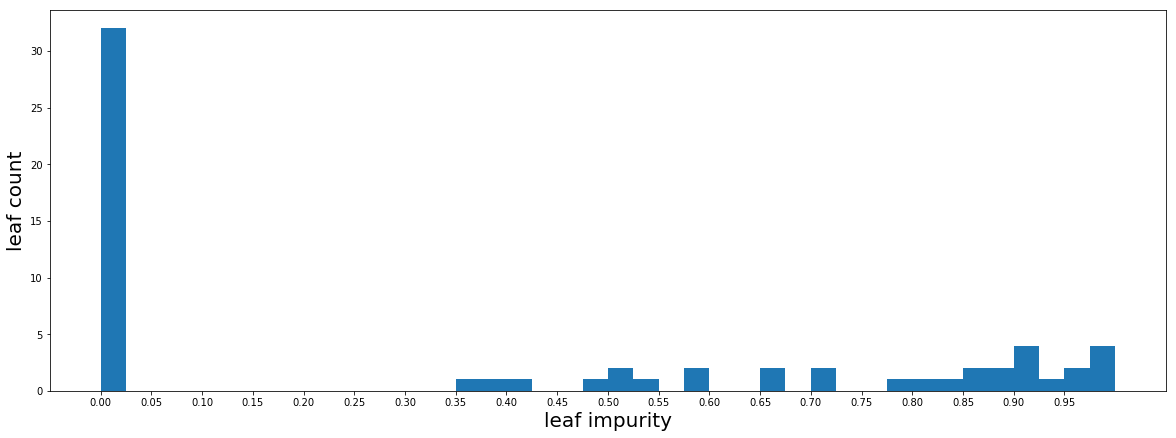

In [68]:
dts3.show_leaf_impurity_distribution(bins=40, figsize=(20, 7))

#### Leaves sample distribution

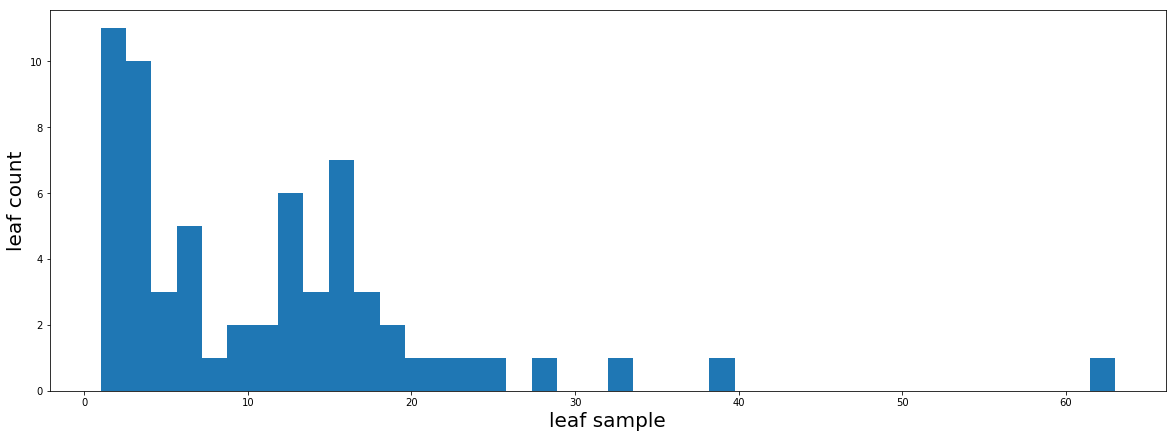

In [69]:
dts3.show_leaf_samples_distribution(bins=40, figsize=(20, 7))

#### Leaves stats

In [70]:
dts3.get_leaf_node_count()

63

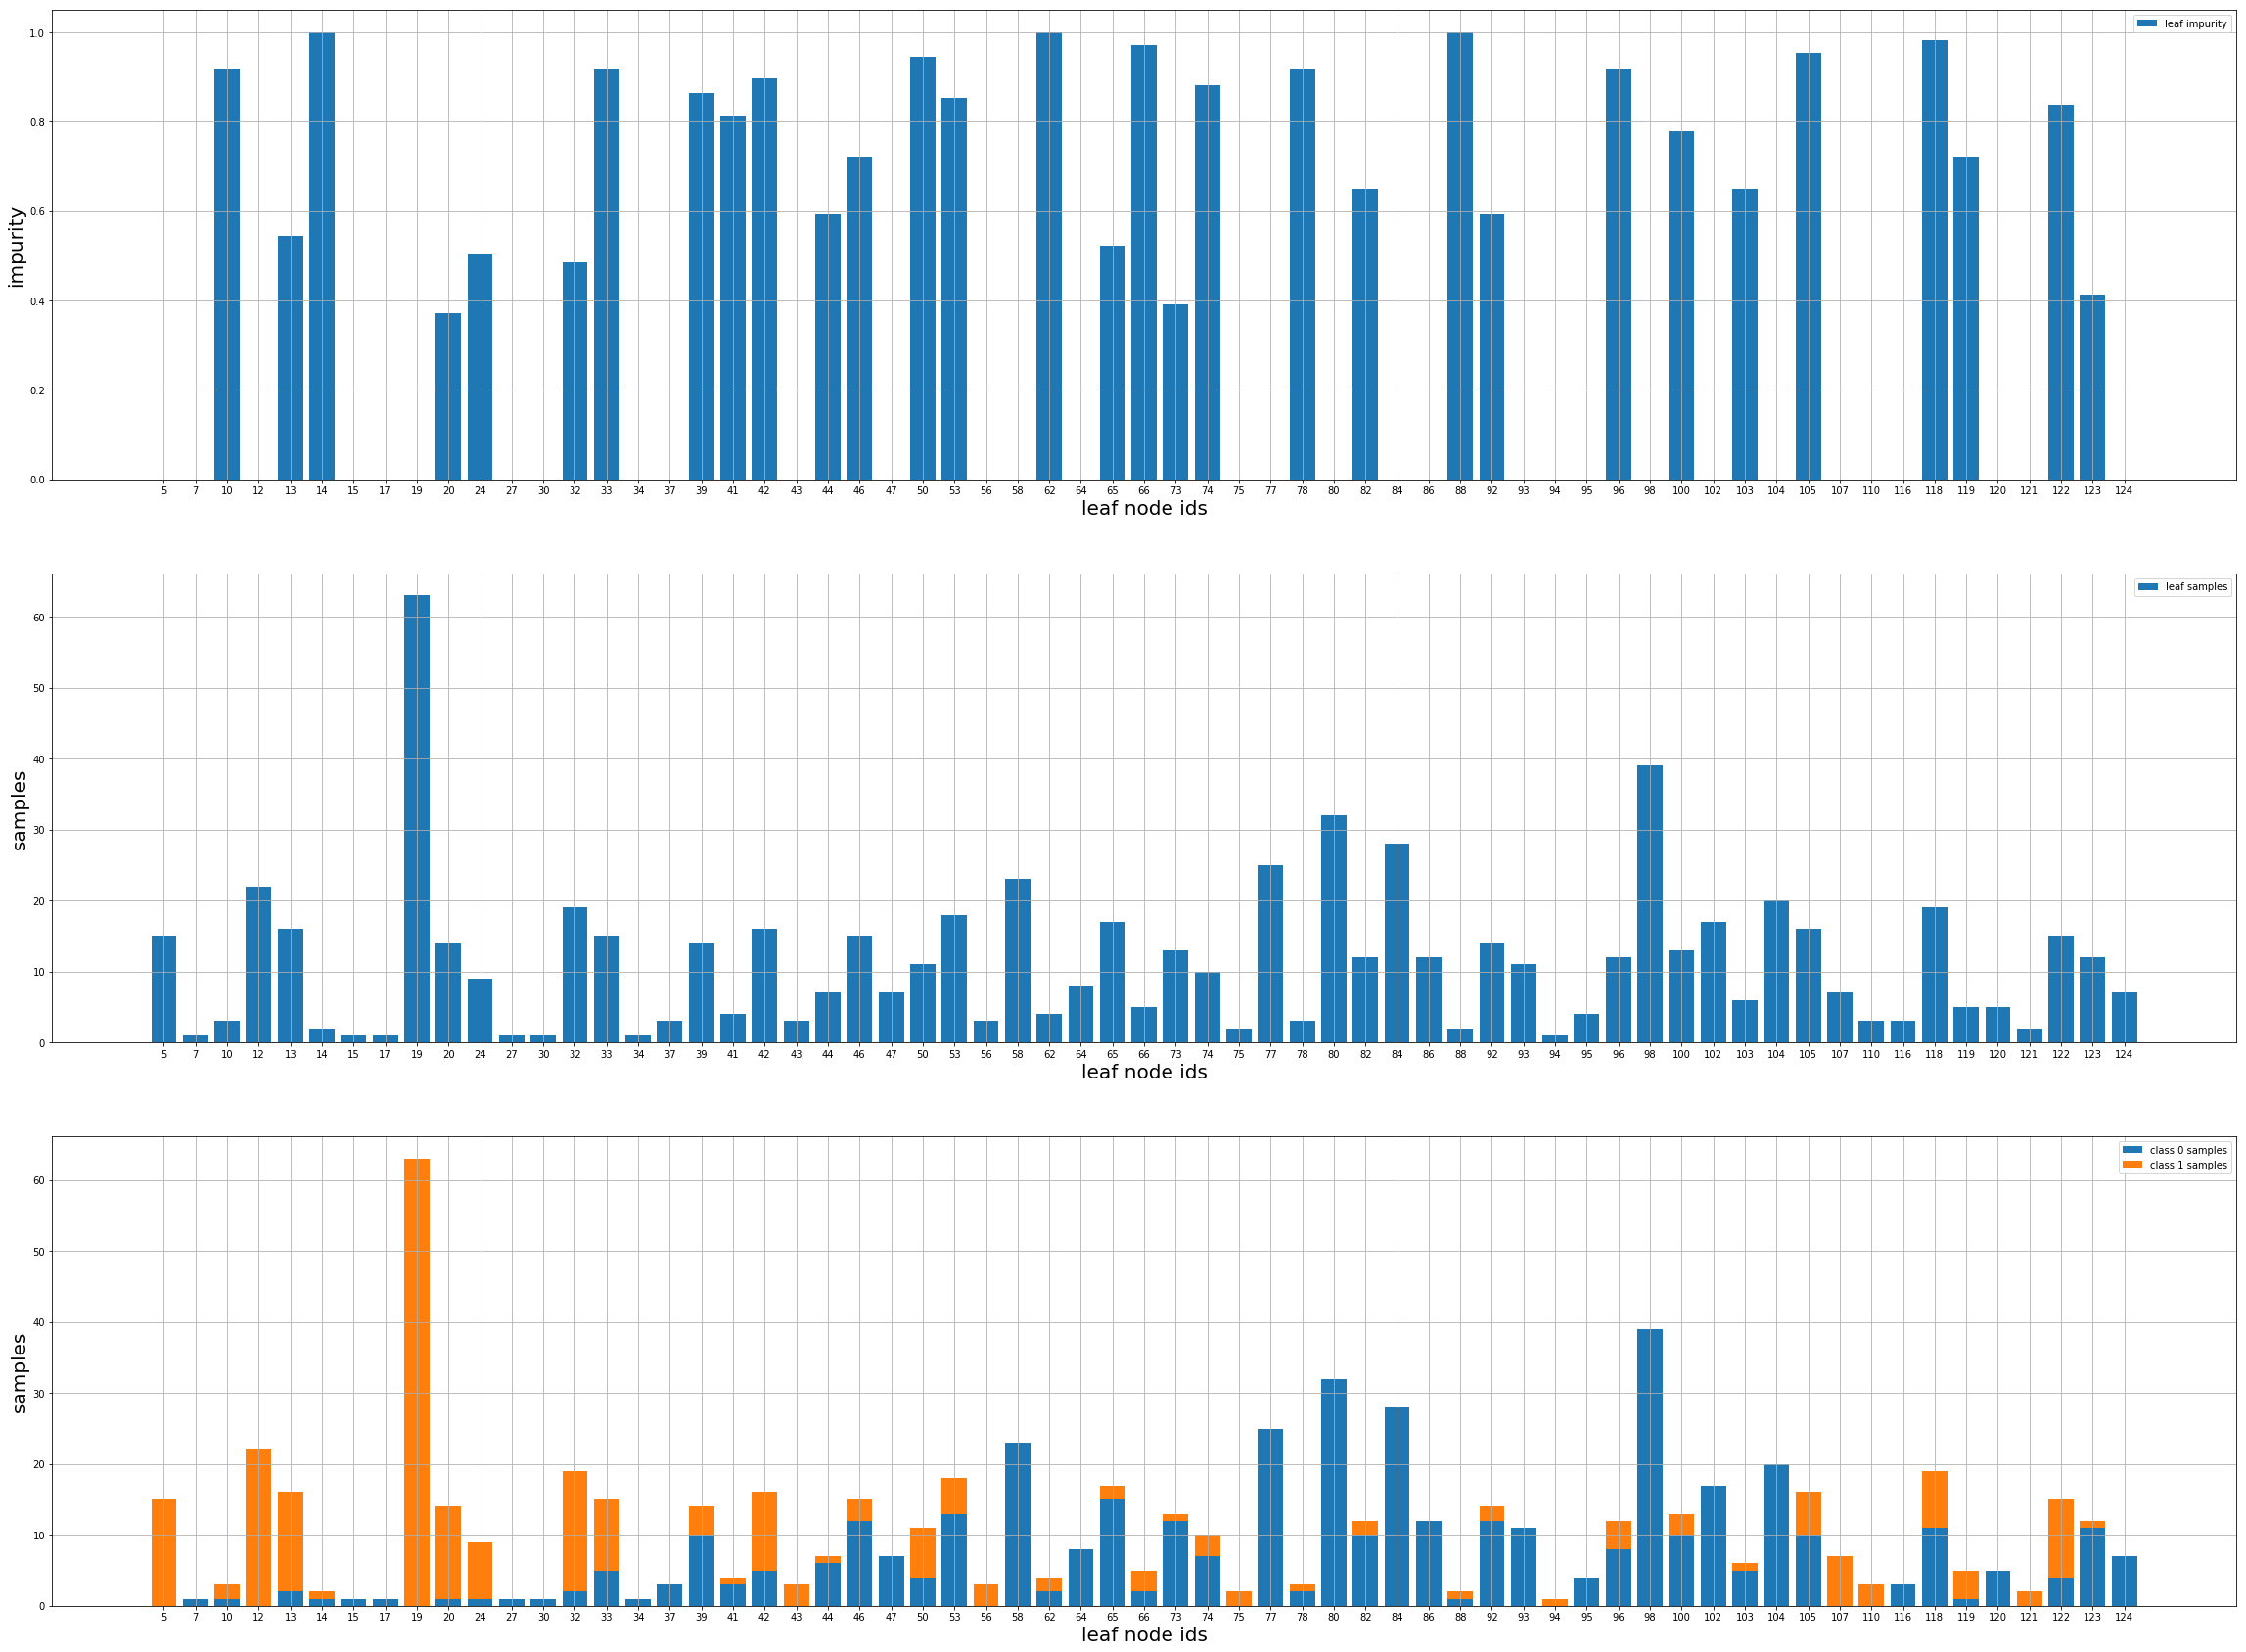

In [71]:
plt.figure(figsize=(40,30))
plt.subplot(3,1,1)
dts3.show_leaf_impurity()

plt.subplot(3,1,2)
dts3.show_leaf_samples()

plt.subplot(3,1,3)
dts3.show_leaf_samples_by_class()

In [72]:
dts3.get_node_samples(node_id=19).sort_values(by=["Survived"])[features + [target]]

INFO - decision paths [[1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]] 


,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label,Survived
8,2,3.0,41.5792,0,-1,0,1
15,1,14.0,120.0000,0,47,2,1
54,1,16.0,57.9792,0,17,0,1
56,1,53.0,51.4792,0,48,2,1
63,1,62.0,80.0000,0,21,-1,1
68,1,35.0,90.0000,0,87,2,1
71,1,36.0,71.0000,0,20,2,1
86,1,30.0,31.0000,0,-1,0,1
96,1,44.0,57.9792,0,17,0,1
99,2,24.0,65.0000,0,-1,2,1


In [73]:
dts3.get_node_samples(node_id=19)[features + [target]].describe()

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label,Survived
count,63.000000,63.000000,63.000000,63.0,63.000000,63.000000,63.0
mean,1.111111,30.873016,78.484192,0.0,62.222222,1.015873,1.0
std,0.316794,13.184169,30.415129,0.0,47.161167,1.023783,0.0
min,1.000000,3.000000,29.000000,0.0,-1.000000,-1.000000,1.0
25%,1.000000,22.500000,55.000000,0.0,19.500000,0.000000,1.0
50%,1.000000,28.000000,78.266700,0.0,65.000000,2.000000,1.0
75%,1.000000,38.500000,92.289600,0.0,100.500000,2.000000,1.0
max,2.000000,63.000000,146.520800,0.0,144.000000,2.000000,1.0


In [74]:
sample = train[features].iloc[120]
print(sample)
print(f"predict class probability {model.predict_proba([sample])}")

Pclass             3.0
Age               28.0
Fare              15.5
Sex_label          0.0
Cabin_label       -1.0
Embarked_label     1.0
Name: 241, dtype: float64
predict class probability [[0. 1.]]


In [47]:
dts3.show_decision_tree_prediction_path(sample)

NameError: name 'dts3' is not defined

[('Pclass', 3.0), ('Age', 28.0), ('Fare', 15.5), ('Sex_label', 0.0), ('Cabin_label', -1.0), ('Embarked_label', 1.0)]



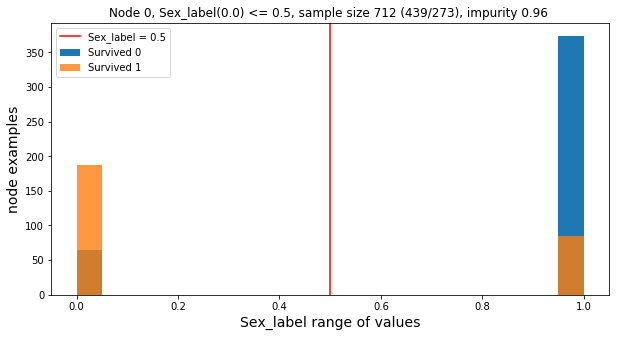

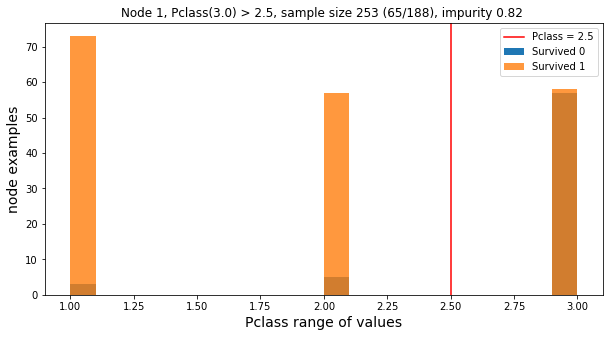

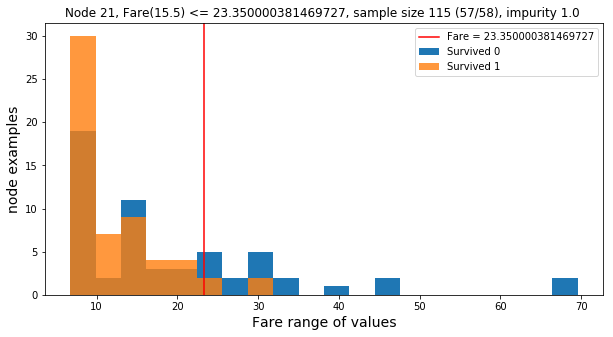

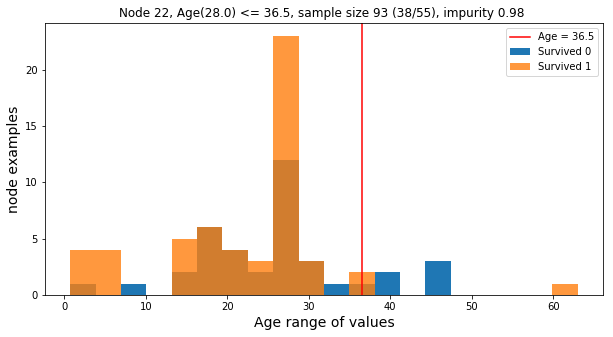

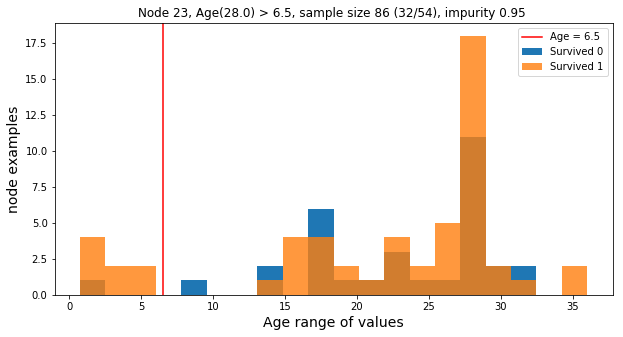

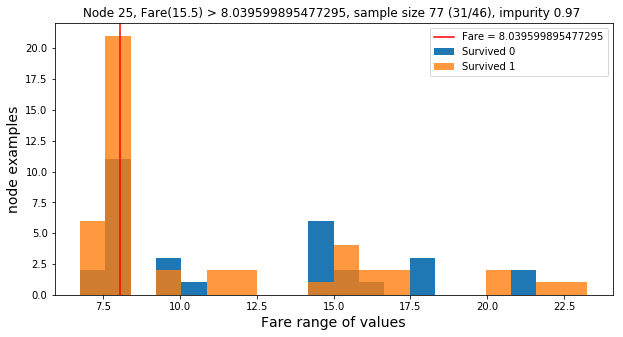

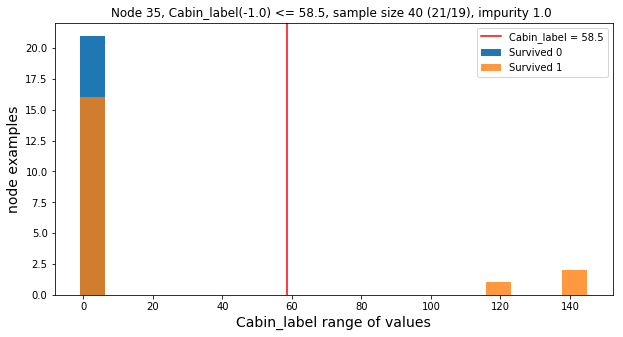

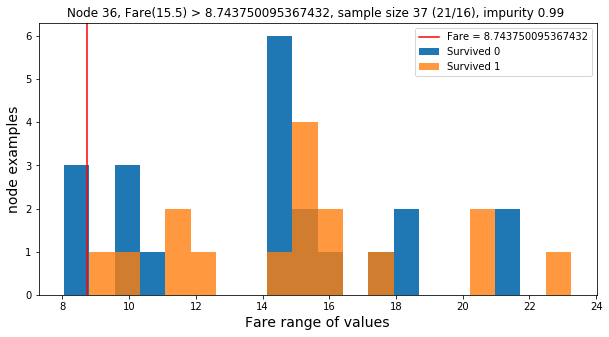

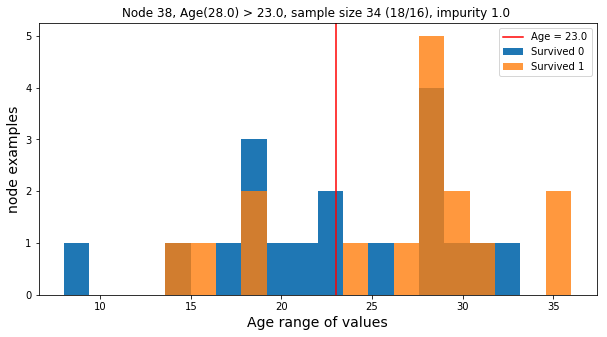

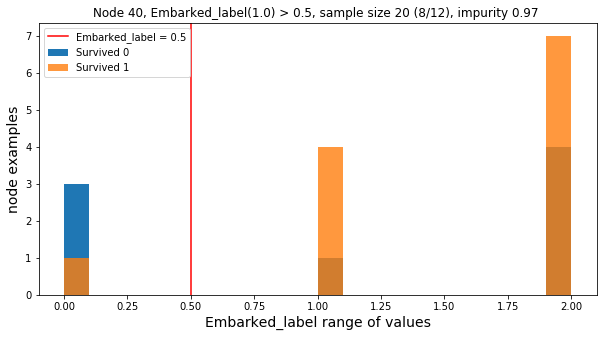

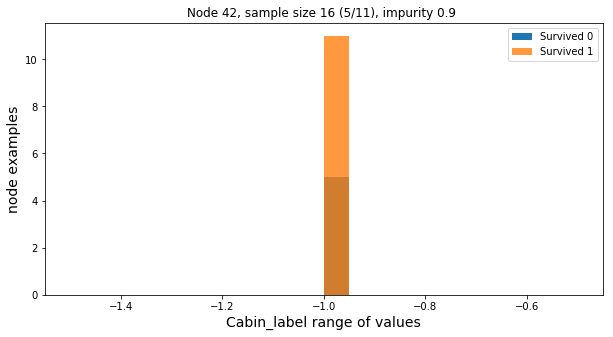

In [76]:
dts3.show_decision_tree_splits_prediction(sample, bins=20)

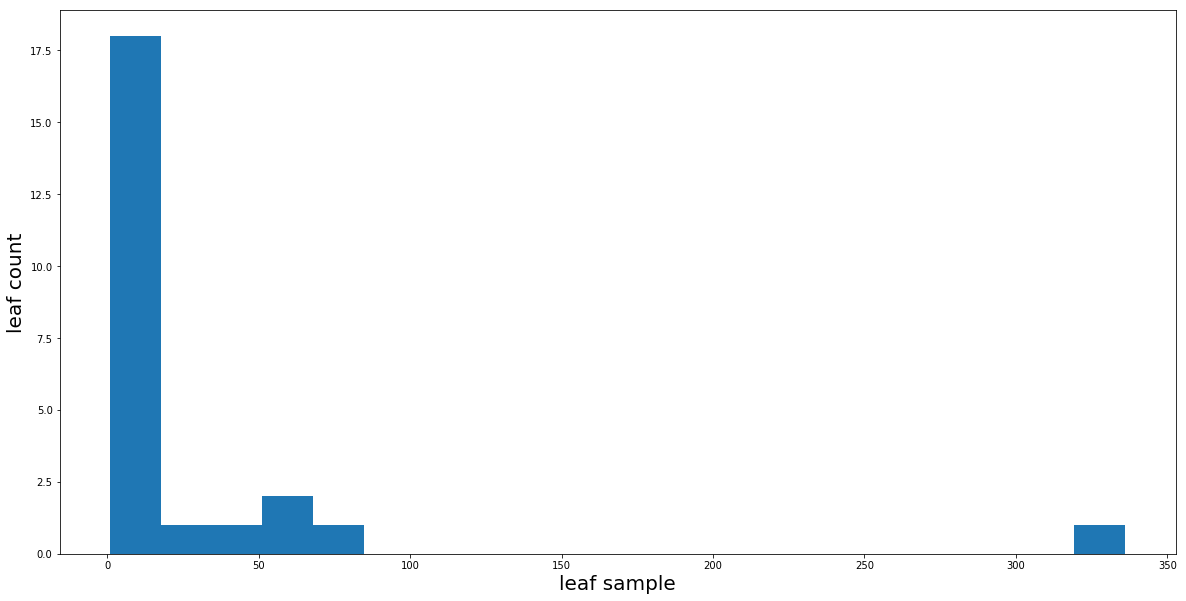

In [77]:
dts.show_leaf_samples_distribution(figsize=(20, 10), bins=20)

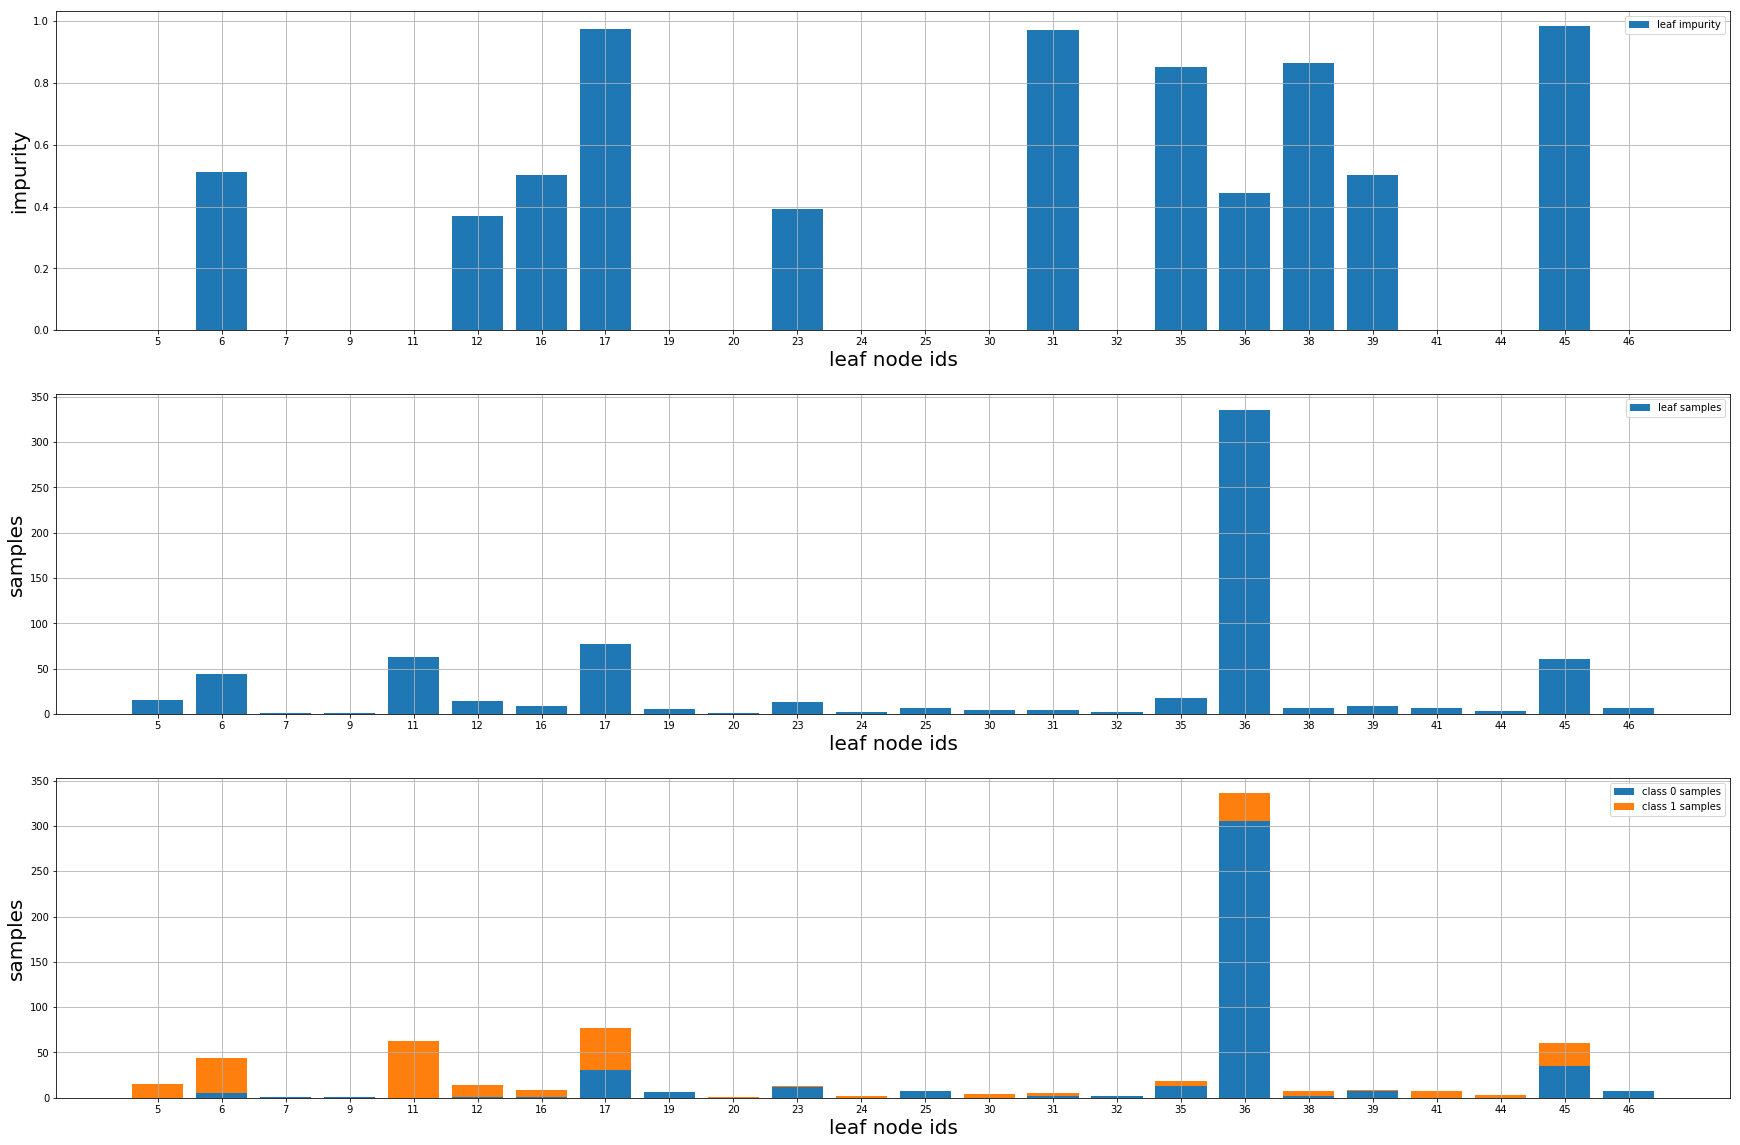

In [79]:
plt.figure(figsize=(30,20))
plt.subplot(3,1,1)
dts.show_leaf_impurity()

plt.subplot(3,1,2)
dts.show_leaf_samples()

plt.subplot(3,1,3)
dts.show_leaf_samples_by_class()
